## Sample Code Snippet

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

## Loading the dataset

In [ ]:
# run the following to mount the google drive to access the data file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the csv into the dataframe
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project 2 - Personal Loan/Loan_Modelling.csv')
data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## Data Overview

In [ ]:
#make a copy of the data to operate on
df = data.copy()


In [ ]:
#check for the rows and columns
df.shape


(5000, 14)

In [ ]:
#get details of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#get the statistical description for all fields
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#check for null values
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


* No null values detected

In [ ]:
#check for duplicates
df.duplicated().sum()

0

* No duplicates detected

## Exploratory Data Analysis.

In [ ]:
# function to create box plot and histogram
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
#dropping the ID column as it doesn't add any value in EDA
df.drop('ID', axis=1)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### Univariate Analysis

#### Age

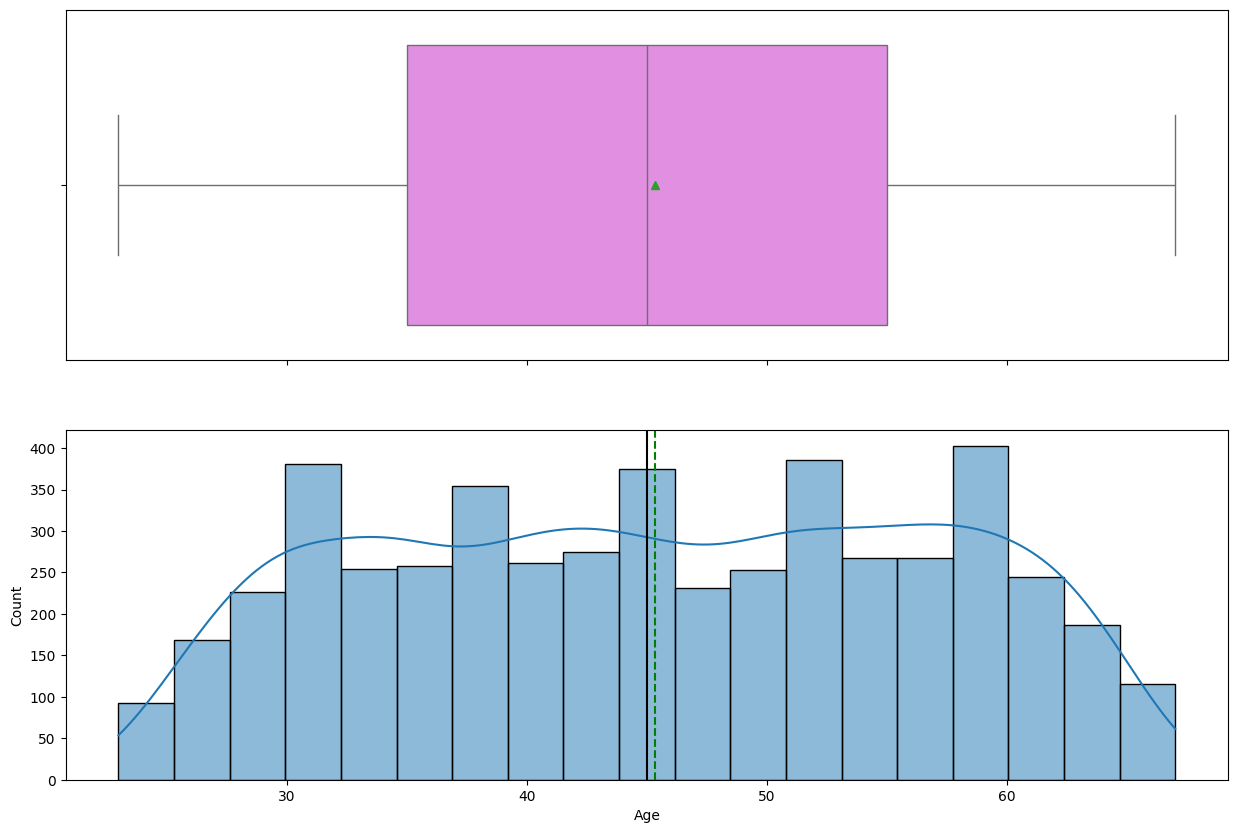

In [ ]:
histogram_boxplot(df, 'Age', kde=True)

<Axes: xlabel='Age', ylabel='Count'>

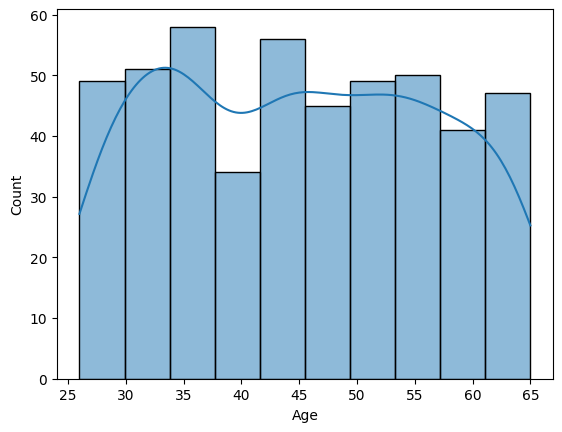

In [ ]:
sns.histplot(data=df[df['Personal_Loan']==1], x='Age', kde=True)

#### Experience

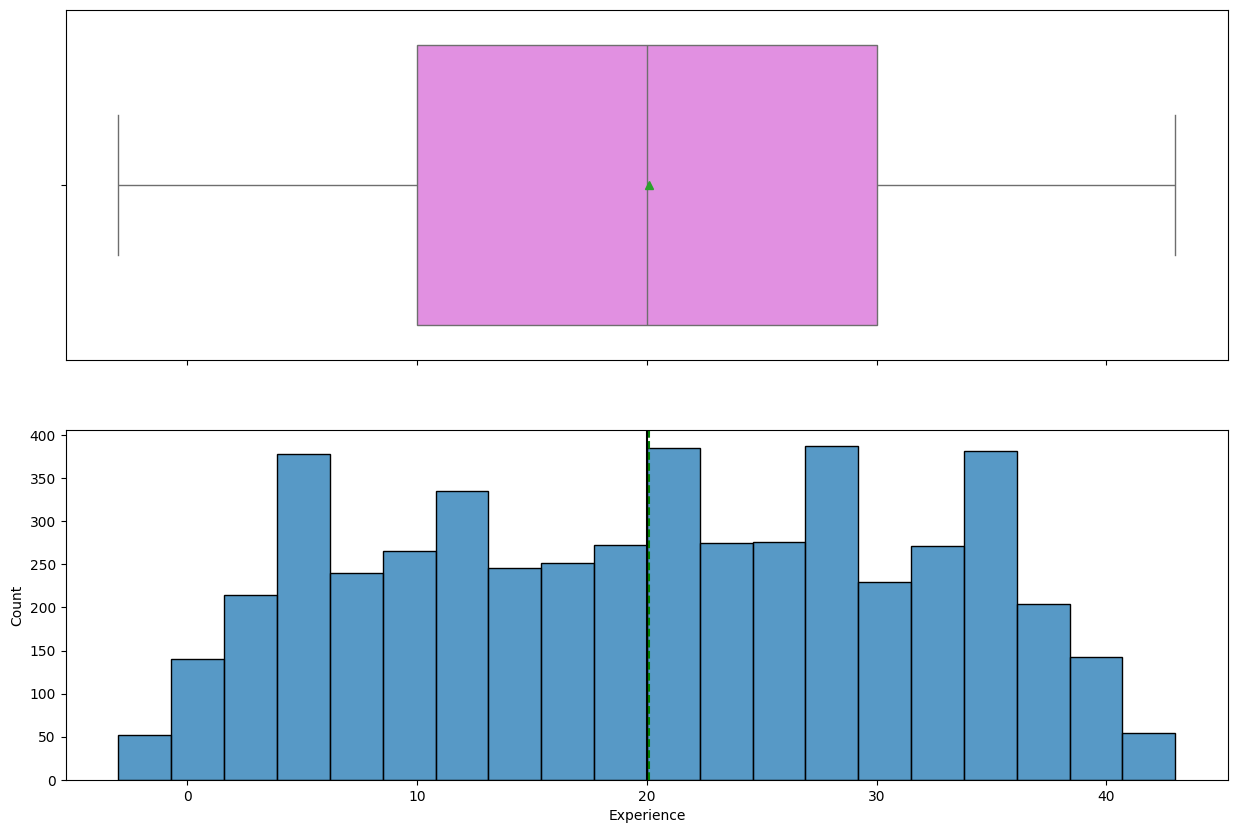

In [ ]:
histogram_boxplot(df, 'Experience')

#### Income

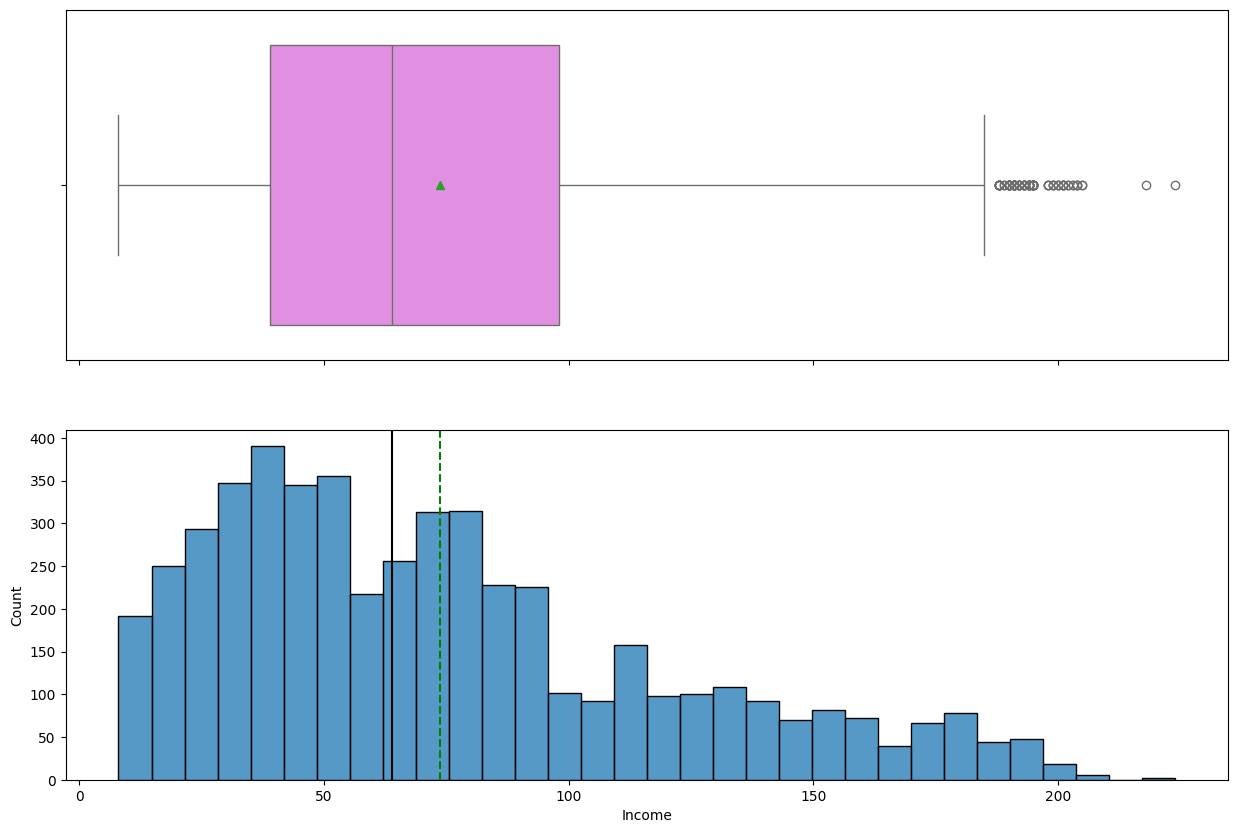

In [ ]:
histogram_boxplot(df, 'Income')

#### ZipCode

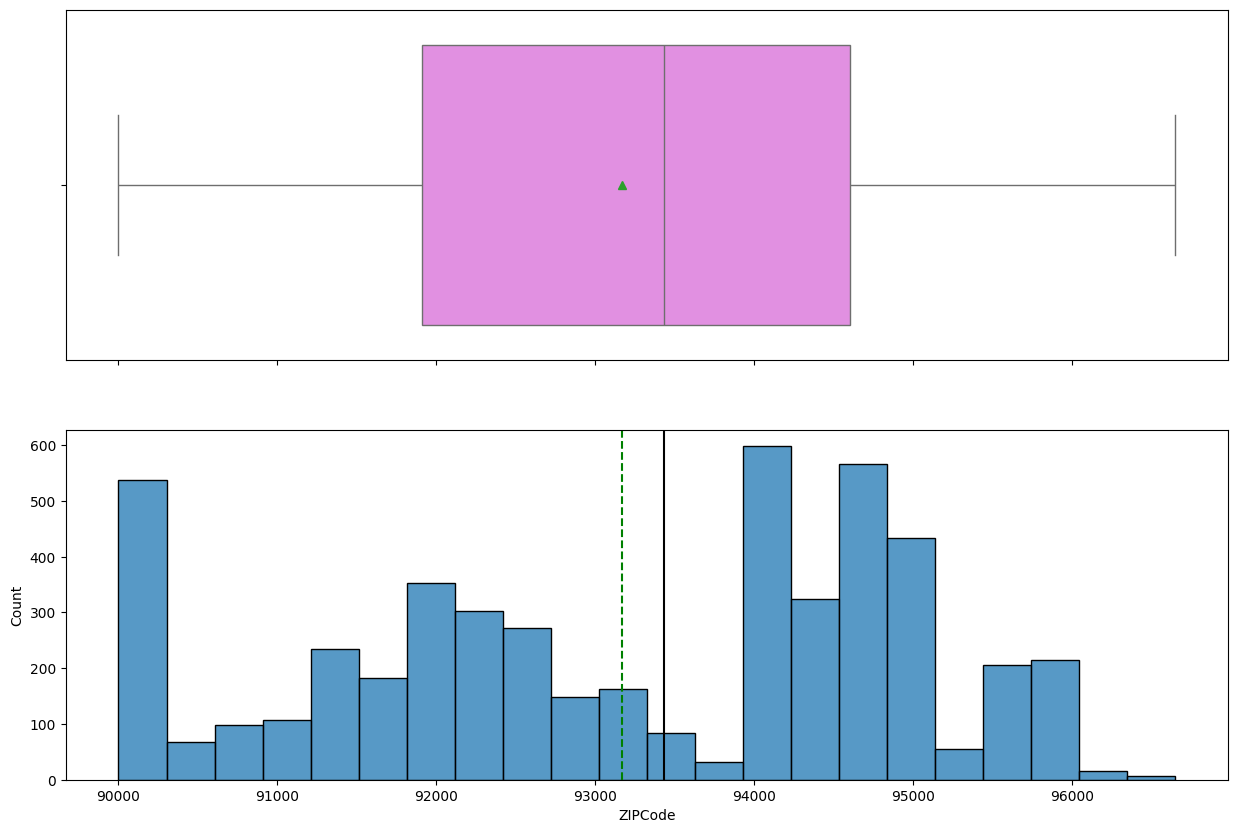

In [ ]:
histogram_boxplot(df, 'ZIPCode')

#### Family

Family
1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: proportion, dtype: float64


<ipython-input-15-52bfb6c416bd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


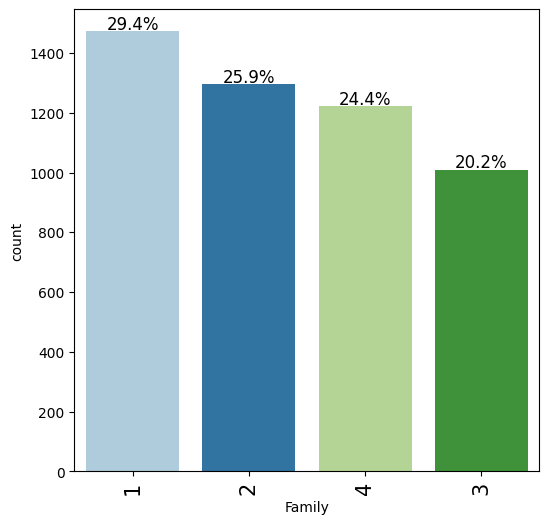

In [ ]:
print(df['Family'].value_counts(normalize=True))
labeled_barplot(df, 'Family', perc=True)

* In the dataset, customers with family size of 1 seems highest around 29% and family size of 3 seems to be the lowest with around 20%

#### CC Avg

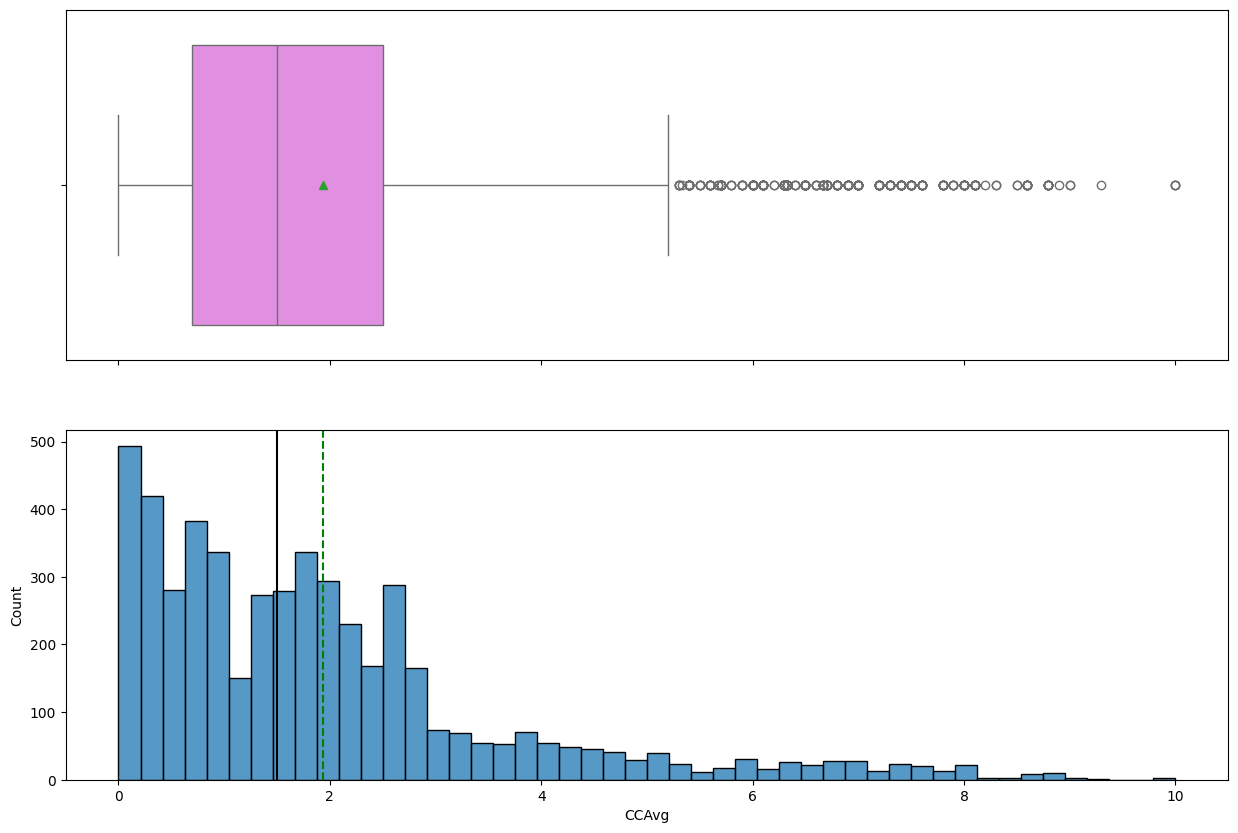

In [ ]:
histogram_boxplot(df, 'CCAvg')

#### Education

<ipython-input-24-52bfb6c416bd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


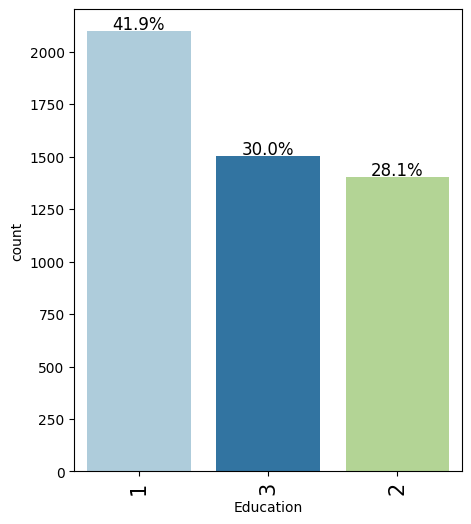

In [ ]:
labeled_barplot(df, 'Education', perc=True)

#### Mortgage

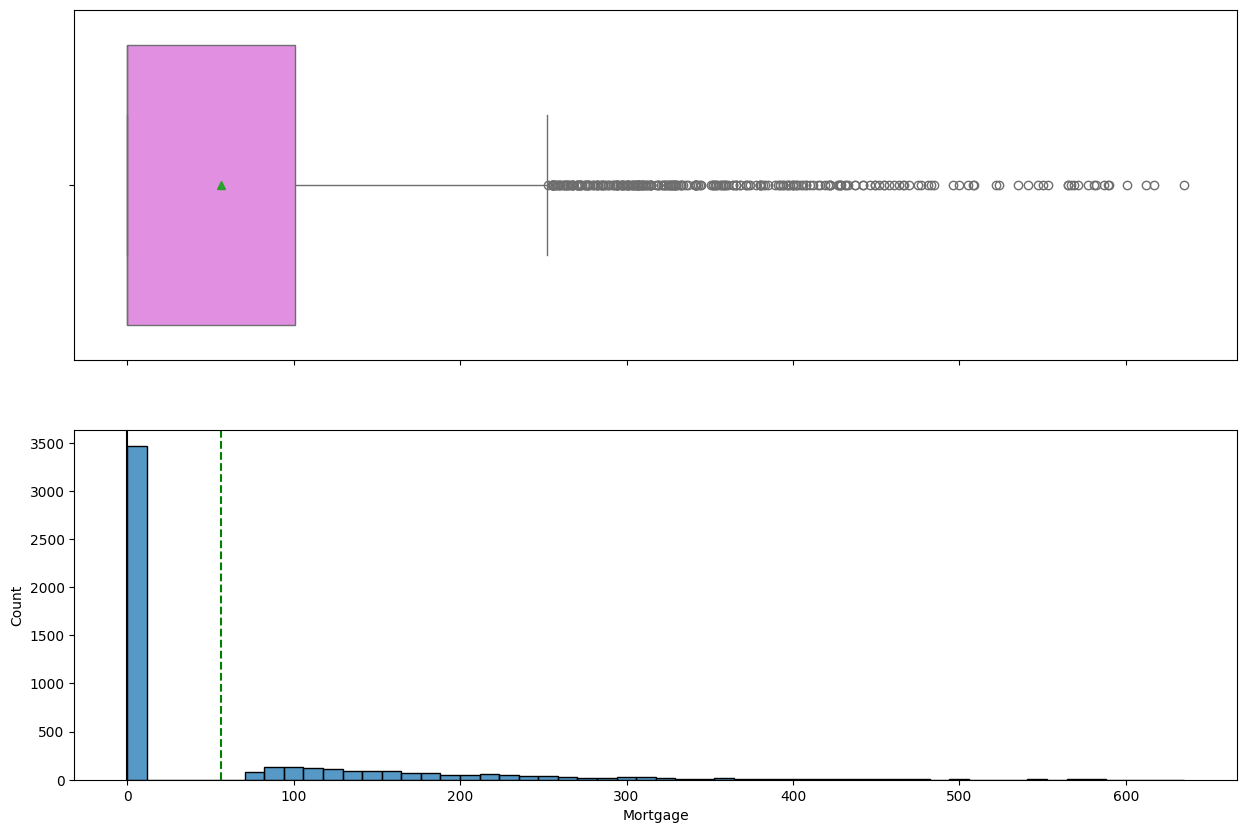

In [ ]:
histogram_boxplot(df, 'Mortgage')

#### Personal Loan

Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


<ipython-input-15-52bfb6c416bd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


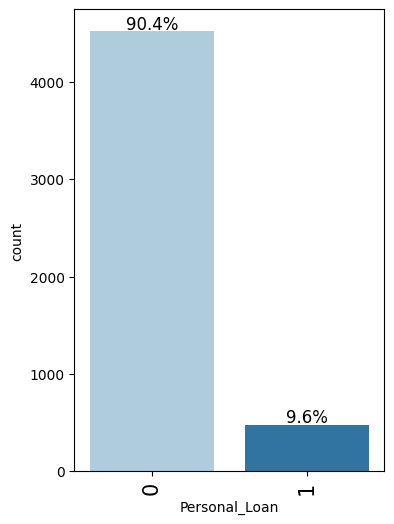

In [ ]:
print(df['Personal_Loan'].value_counts(normalize=True))
labeled_barplot(df, 'Personal_Loan', perc=True)

* Around 10% of the customers accepted the personal loans offers during the last campaign


#### Securities Account

Securities_Account
0    0.8956
1    0.1044
Name: proportion, dtype: float64


<ipython-input-15-52bfb6c416bd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


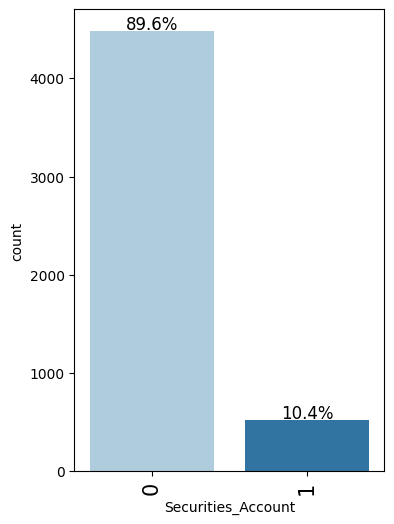

In [ ]:
print(df['Securities_Account'].value_counts(normalize=True))
labeled_barplot(df, 'Securities_Account', perc=True)

* Only around 10% of the customers have securities account

#### CD Account

CD_Account
0    0.9396
1    0.0604
Name: proportion, dtype: float64


<ipython-input-15-52bfb6c416bd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


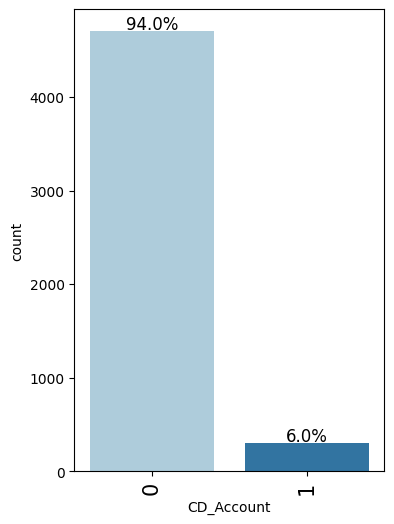

In [ ]:
print(df['CD_Account'].value_counts(normalize=True))
labeled_barplot(df, 'CD_Account', perc=True)

* Only around 6% of the customer have a CD account

#### Online

<ipython-input-24-52bfb6c416bd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


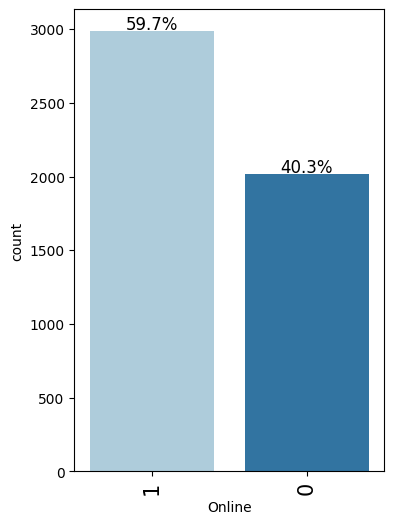

In [ ]:
labeled_barplot(df, 'Online', perc=True)

* Around 60% of the customers access accounts online

#### Credit Card

CreditCard
0    3530
1    1470
Name: count, dtype: int64


<ipython-input-15-52bfb6c416bd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


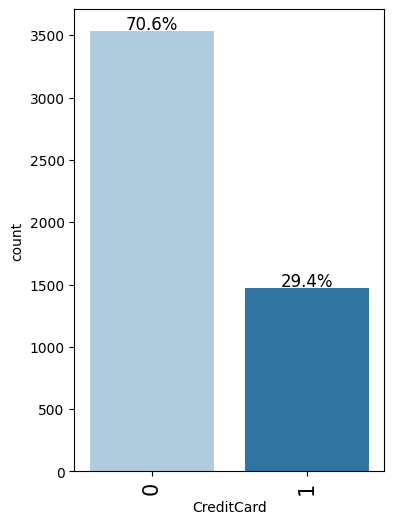

In [ ]:
print(df['CreditCard'].value_counts())
labeled_barplot(df, 'CreditCard', perc=True)

### Bivariate Analysis

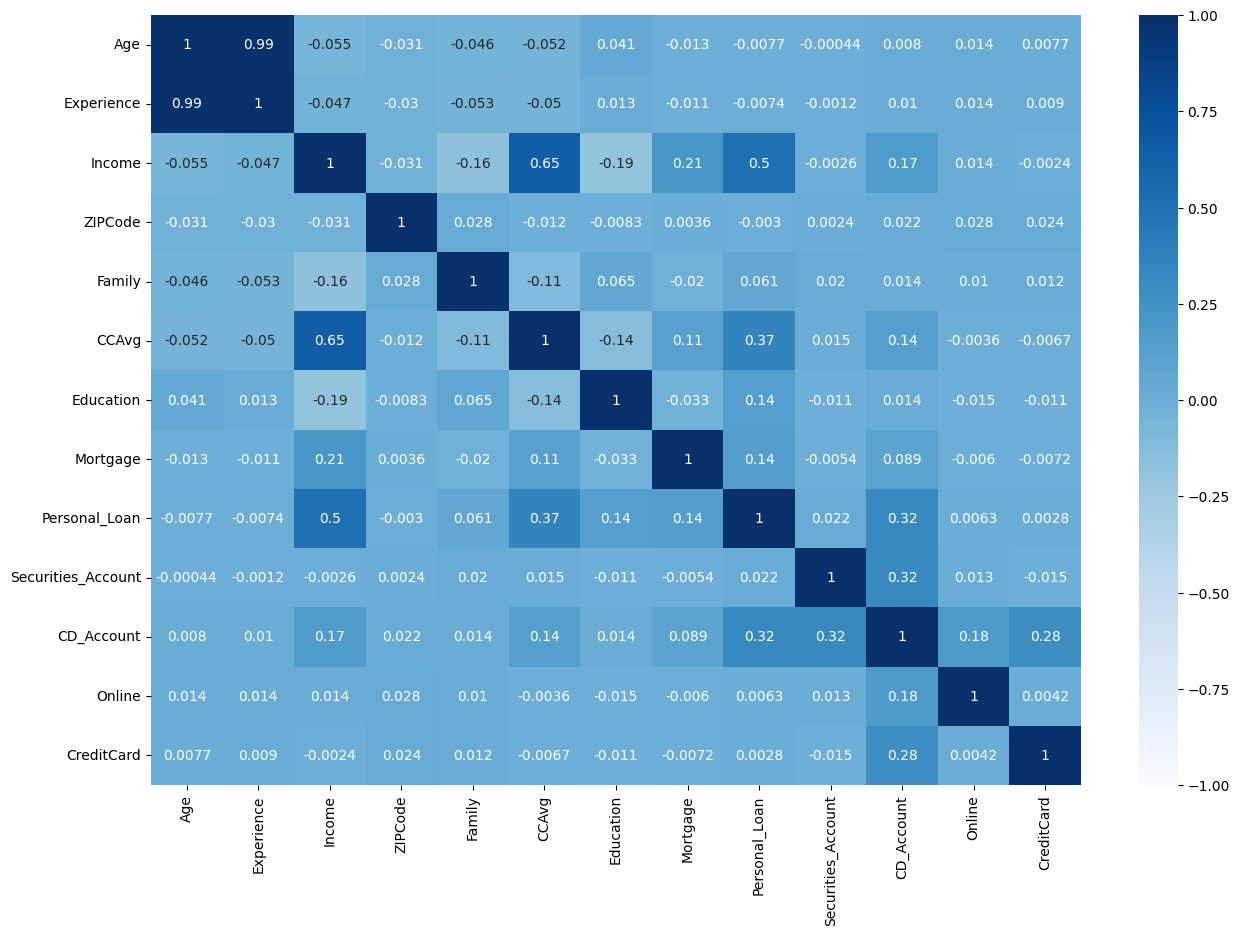

In [ ]:
#generate the heatmap to understand the correlation of attributes with customers accepting personal loan offers
col_list = df.select_dtypes(include='number').columns.tolist()
col_list.remove('ID')

plt.figure(figsize=(15, 10))
sns.heatmap(df[col_list].corr(), annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.show()


#### Age vs Personal loan

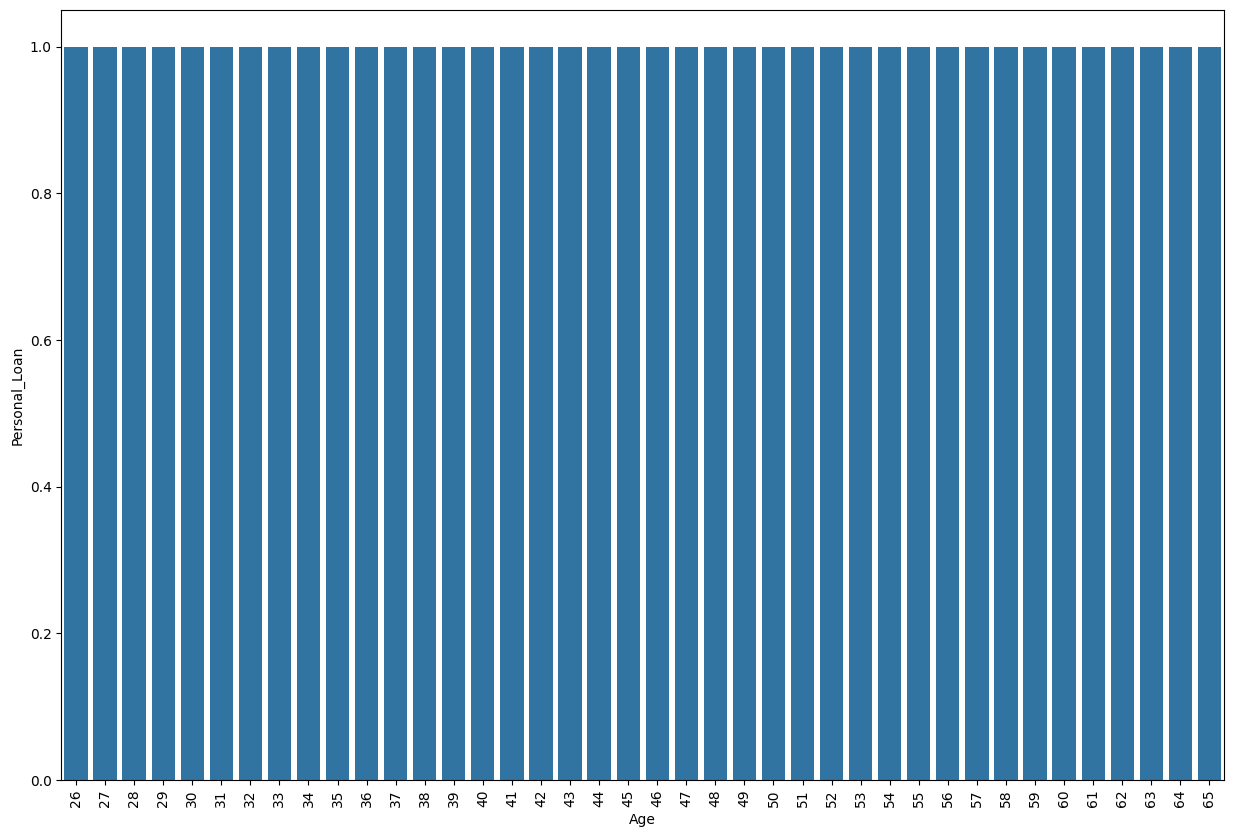

In [ ]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
sns.barplot(data=df[df['Personal_Loan']==1], x='Age', y='Personal_Loan')
plt.show()

#### Income vs Personal loan

<Axes: xlabel='Personal_Loan', ylabel='Income'>

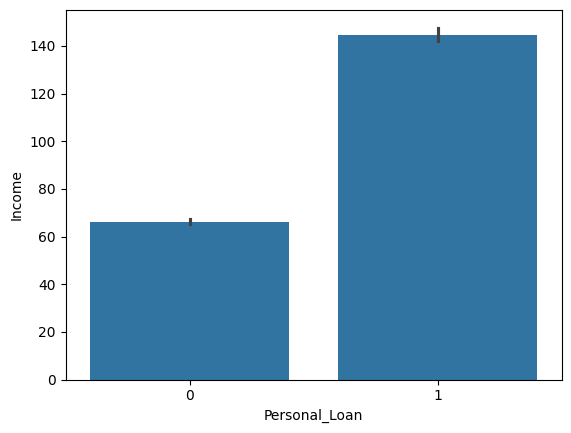

In [ ]:
sns.barplot(data=df, x='Personal_Loan', y='Income')

<Axes: xlabel='Personal_Loan', ylabel='Income'>

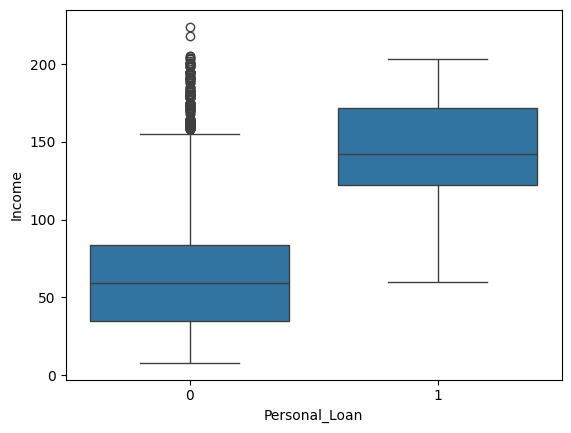

In [ ]:
sns.boxplot(data=df, x='Personal_Loan', y='Income')

#### CCAvg vs Personal loan

<Axes: xlabel='Personal_Loan', ylabel='CCAvg'>

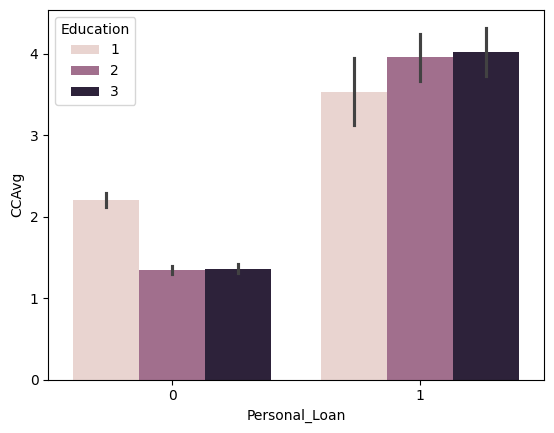

In [ ]:
sns.barplot(data=df, x='Personal_Loan', y='CCAvg', hue='Education')

<Axes: xlabel='Personal_Loan', ylabel='CCAvg'>

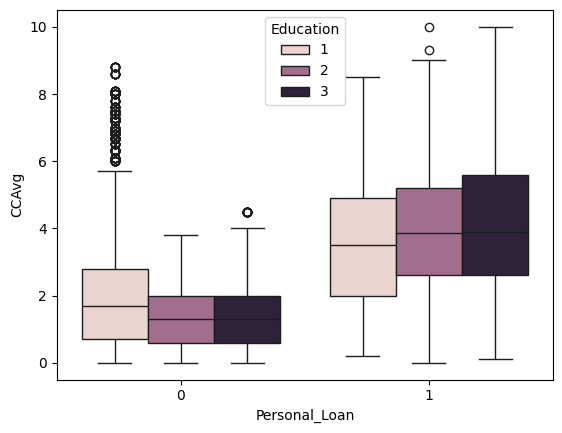

In [ ]:
sns.boxplot(data=df, x='Personal_Loan', y='CCAvg', hue='Education')

#### CD_Account vs Personal loan

<Axes: xlabel='Personal_Loan', ylabel='CD_Account'>

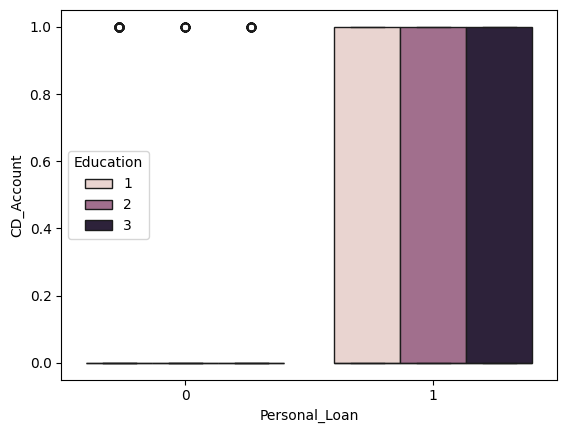

In [ ]:
sns.boxplot(data=df, x='Personal_Loan', y='CD_Account', hue='Education')

#### Education vs Personal loan

<Axes: xlabel='Personal_Loan', ylabel='Education'>

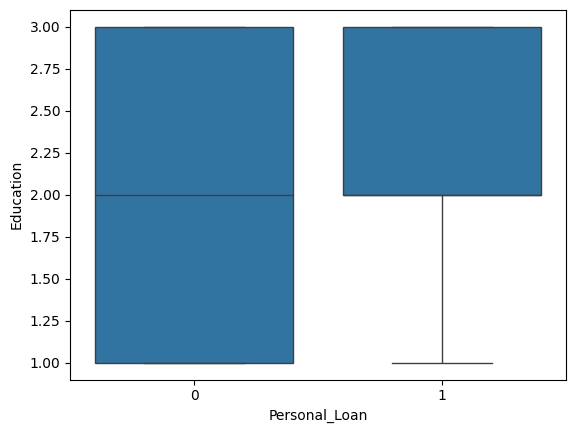

In [ ]:
sns.boxplot(data=df, x='Personal_Loan', y='Education')

#### Mortgage vs Personal loan

<Axes: xlabel='Personal_Loan', ylabel='Mortgage'>

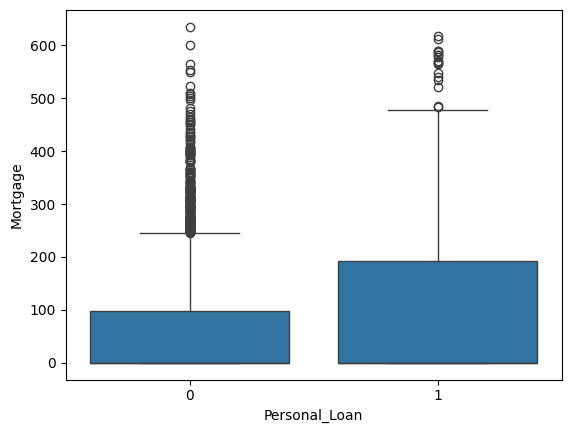

In [ ]:
sns.boxplot(data=df, x='Personal_Loan', y='Mortgage')

#### Family vs Personal Loan

<Axes: xlabel='Personal_Loan', ylabel='Family'>

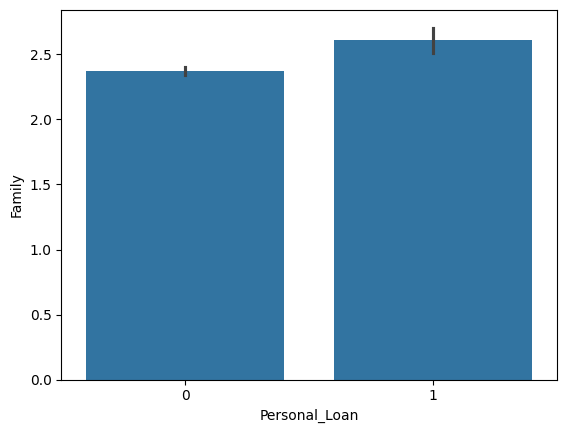

In [ ]:
sns.barplot(data=df, x='Personal_Loan', y='Family')

<Axes: xlabel='Personal_Loan', ylabel='Family'>

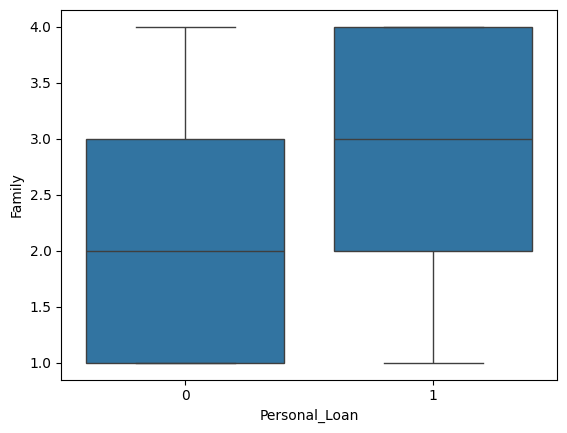

In [ ]:
sns.boxplot(data=df, x='Personal_Loan', y='Family')

* 75% of the customers who accepted the personal loan offer have who have a family size of more than 2

#### Online vs Personal Loan

<Axes: xlabel='Personal_Loan', ylabel='Online'>

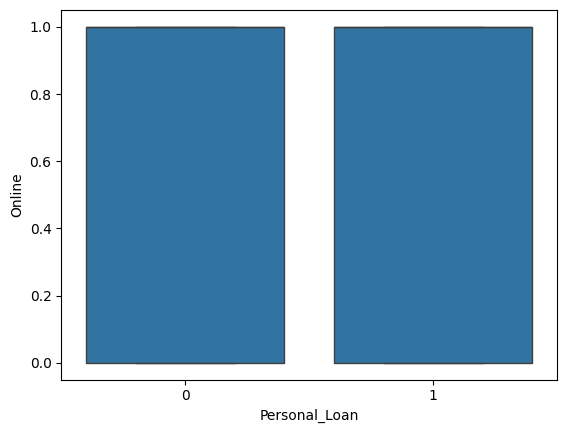

In [ ]:
sns.boxplot(data=df, x='Personal_Loan', y='Online')

## Data Preprocessing

### Handling the negative values

In [ ]:
#check the negative value in the experience
df['Experience'].value_counts()

,count
Experience,
32,154
20,148
9,147
5,146
23,144
35,143
25,142
28,138
18,137


In [ ]:
#take the abs values of the experience to remove the negative experience which doesn't make sense
df['Experience'] = df['Experience'].abs()
df[df['Experience']< 0]['Experience'].count()

0

### Handling the Zipcode values

In [ ]:
df['region'] = df['ZIPCode'].astype(str)
df['region'] = df['region'].str[:2]
df['region'].value_counts()

,count
region,
94,1472
92,988
95,815
90,703
91,565
93,417
96,40


In [ ]:
df['region'] = df['region'].astype(object)

In [ ]:
#Prepare the X, y datasets for training and testing
X = df.drop(['ID','Personal_Loan','ZIPCode'], axis=1)
y = df['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(float)

X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,region_91,region_92,region_93,region_94,region_95,region_96
0,25.0,1.0,49.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,45.0,19.0,34.0,3.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39.0,15.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,35.0,9.0,100.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,35.0,8.0,45.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Check the almost equal distribution of the attribute to be pridicted in both train and test data
print('Shape and Distribution in Train data \n', X_train.shape, '\n', 100* y_train.value_counts(normalize=True))
print('Shape and Distribution in Test data \n', X_test.shape, '\n', 100* y_test.value_counts(normalize=True))

Shape and Distribution in Train data 
 (4000, 12) 
 Personal_Loan
0    90.625
1     9.375
Name: proportion, dtype: float64
Shape and Distribution in Test data 
 (1000, 12) 
 Personal_Loan
0    89.5
1    10.5
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
#define a function to plot the confusion matrix with labels
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

In [ ]:
def plot_decision_tree(model, predictors):
    """
    To plot the decision tree

    model: classifier
    feature_names: list of feature names
    """
    # list of feature names in predictors
    feature_names = list(predictors.columns)

    # set the figure size for the plot
    plt.figure(figsize=(20, 20))

    # plotting the decision tree
    out = tree.plot_tree(
        model,                         # decision tree classifier model
        feature_names=feature_names,    # list of feature names (columns) in the dataset
        filled=True,                    # fill the nodes with colors based on class
        fontsize=9,                     # font size for the node text
        node_ids=False,                 # do not show the ID of each node
        class_names=None,               # whether or not to display class names
    )

    # add arrows to the decision tree splits if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")    # set arrow color to black
            arrow.set_linewidth(1)          # set arrow linewidth to 1

    # displaying the plot
    plt.show()

Model can make wrong predictions as:

* Predicting a potential customer who will accept the offer as he will not (FN)
* Predicting a potentail customer who will not accept the offer as he will (FP)

In this case as the objective in the problem statement, we need to predict the liability customer going to accept the a personal loan offer. Hence it becomes important to reduce the false negatives to leave out any potential customer the bank want to send the perosonal loan campaign.

* As the bank's intention is to reach out more potentail customer, we need to focus on the Recall metrics more which will focus on reducing the false negatvies.


### Model Building

In [ ]:
#Create an instance of the DecisionTreeClassifier  and train the model to learn the patterns
dtree = DecisionTreeClassifier(random_state=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
#print the model evaluation parameters for training data
model_performance_classification(dtree, X_train, y_train)


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


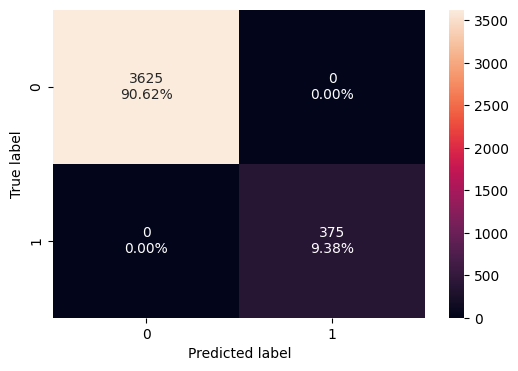

In [ ]:
#Plot the confusion matrix on training to check the percentages of TP, FP, TN, FN
plot_confusion_matrix(dtree, X_train, y_train)

* Default model is overfit as accuracy, recall, precision & f1 scores are 1
* Also the FP and FN are zero.

In [ ]:
#print the model perfomance the test data
model_performance_classification(dtree, X_test, y_test)


,Accuracy,Recall,Precision,F1
0,0.987,0.92381,0.95098,0.937198


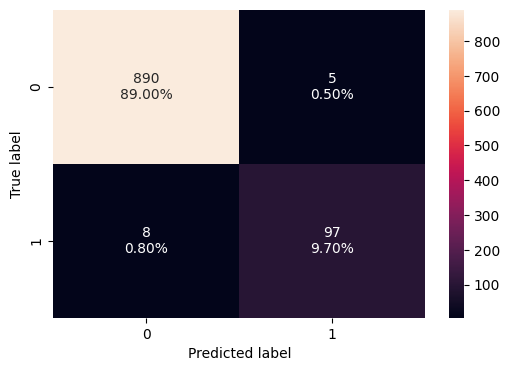

In [ ]:
#plot the percentages for TP, FP, TN, FN
plot_confusion_matrix(dtree, X_test, y_test)

* Performance of the default model has gone down on the test data
* There are 7 FP and FN on the test data

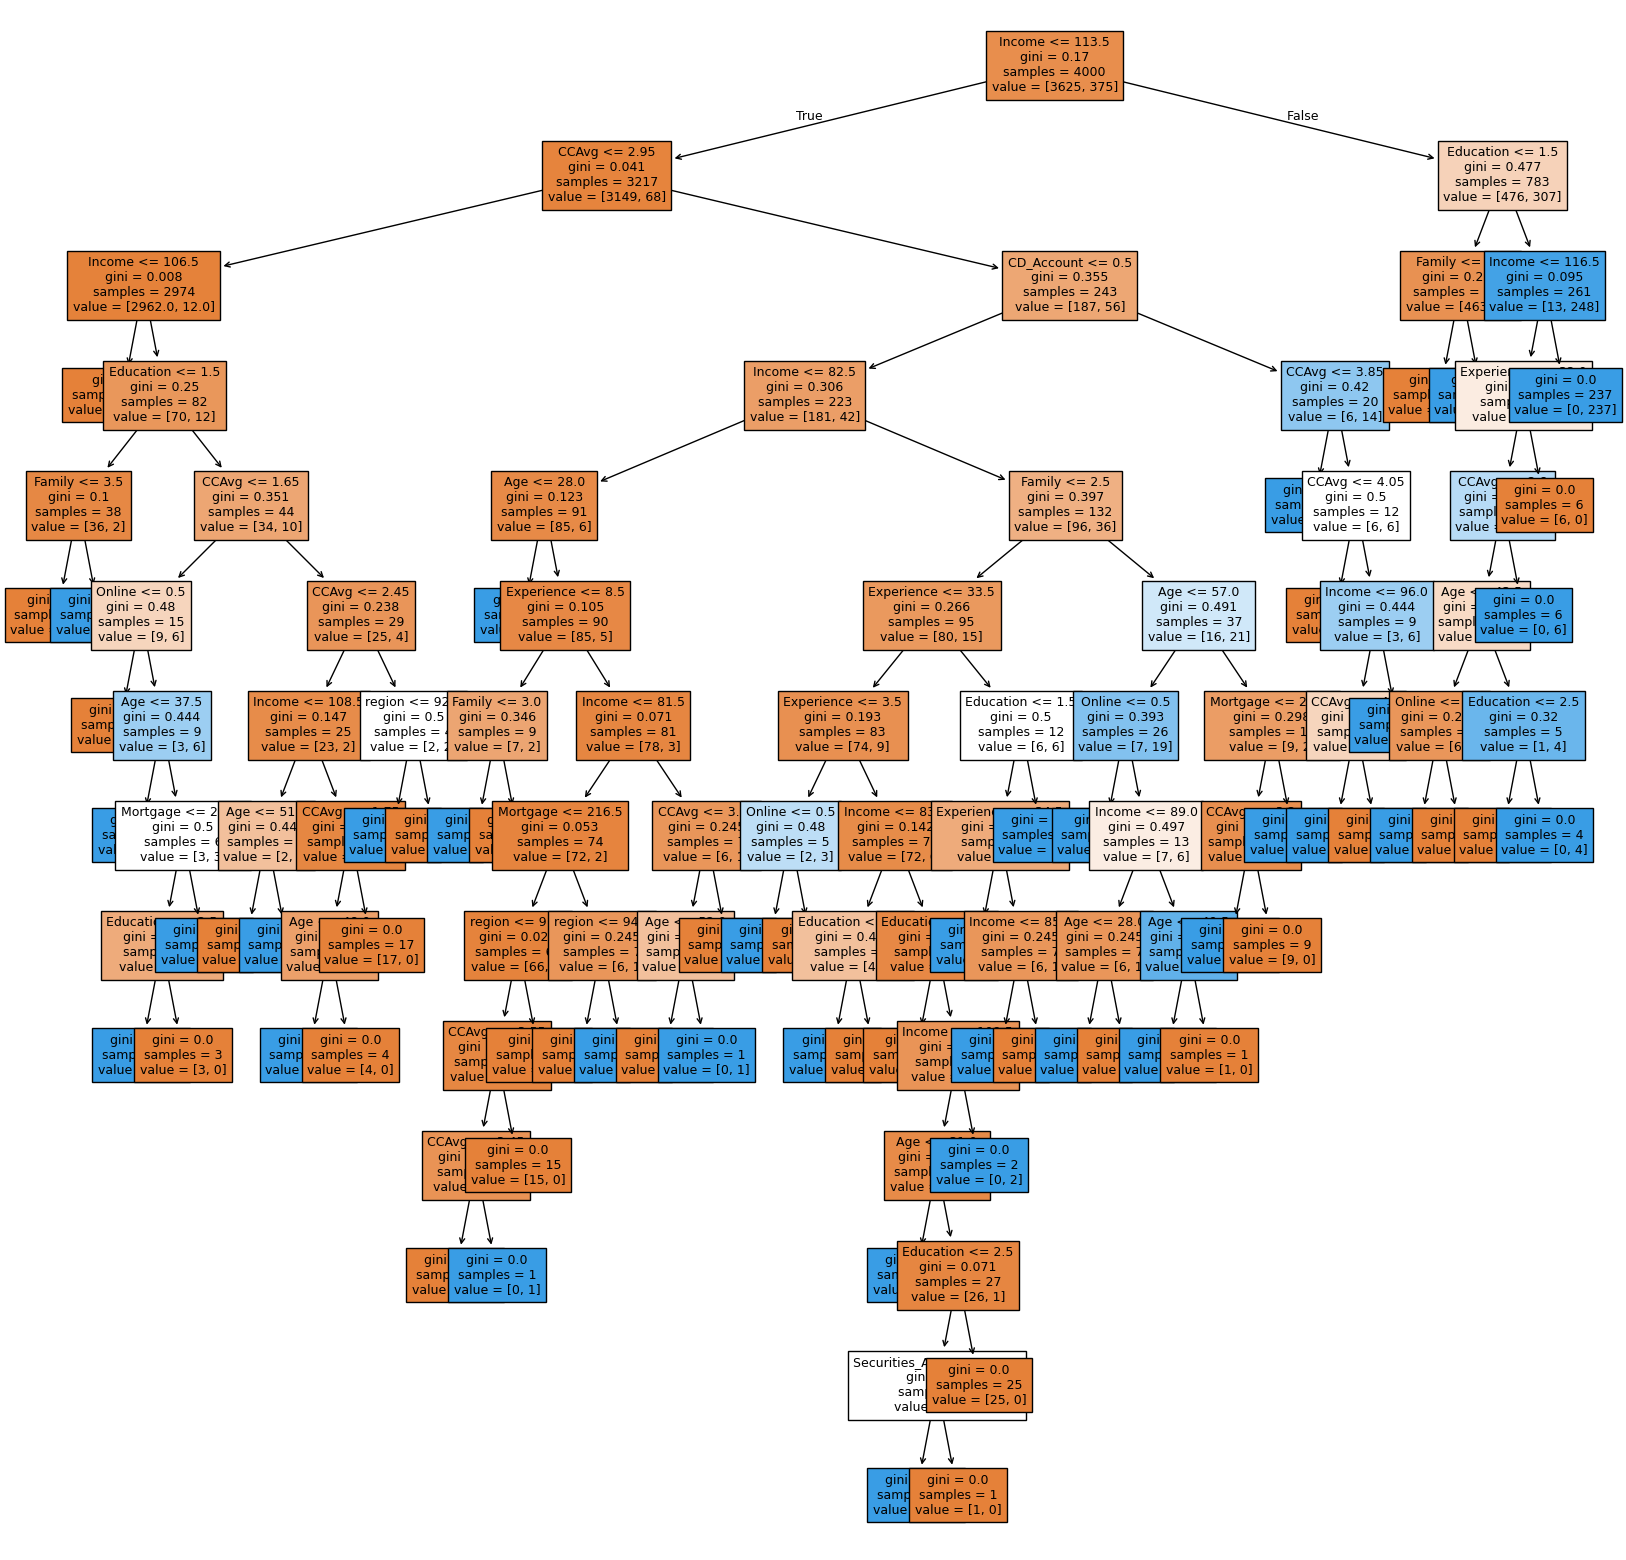

In [ ]:
plot_decision_tree(dtree, X_train)

#### Observations

* Going with the default decision tree is not ideal as the model is clearly overfitting (learnt noise in the data too). This is indicted by the Accuracy, Precision, Recall & F1 score at 1.
* Also the visual decision tree indicates that many leaf nodes have just one sample with gini as 0, indicating overfitting
* Hence we need to go with model performance improvement steps using pre-pruning and post pruning techniques.


## Model Performance Improvement

### Pre-pruning - Decision Tree

In [ ]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator_f1 = None
best_estimator_recall = None
best_score_diff_f1 = float('inf')
best_score_diff_recall = float('inf')
random_state = 10

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=random_state
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate Recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff_recall = abs(train_recall_score - test_recall_score)
            score_diff_f1 = abs(train_f1_score - test_f1_score)

            # find the best estimator based on recall score
            if score_diff_recall < best_score_diff_recall:
                best_score_diff_recall = score_diff_recall
                best_estimator_recall = estimator

            # find the best estimator based on f1 score
            if score_diff_f1 < best_score_diff_f1:
              best_score_diff_f1 = score_diff_f1
              best_estimator_f1 = estimator

In [ ]:
best_estimator_recall

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20, min_samples_split=20,
                       random_state=10)

In [ ]:
best_estimator_f1

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, min_samples_split=30,
                       random_state=10)

In [ ]:
#print the evaluation parameters
model_performance_classification(best_estimator_f1, X_train, y_train)


,Accuracy,Recall,Precision,F1
0,0.98675,0.898667,0.957386,0.927098


In [ ]:
#print the evaluation parameters on train data
model_performance_classification(best_estimator_recall, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.987,0.898667,0.960114,0.928375


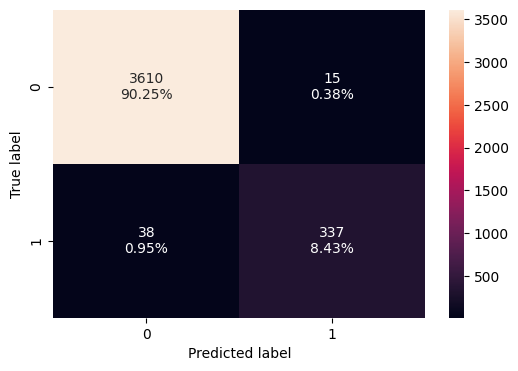

In [ ]:
#print the percentages of TP, FP, TN, FN on train data
plot_confusion_matrix(best_estimator_f1, X_train, y_train)

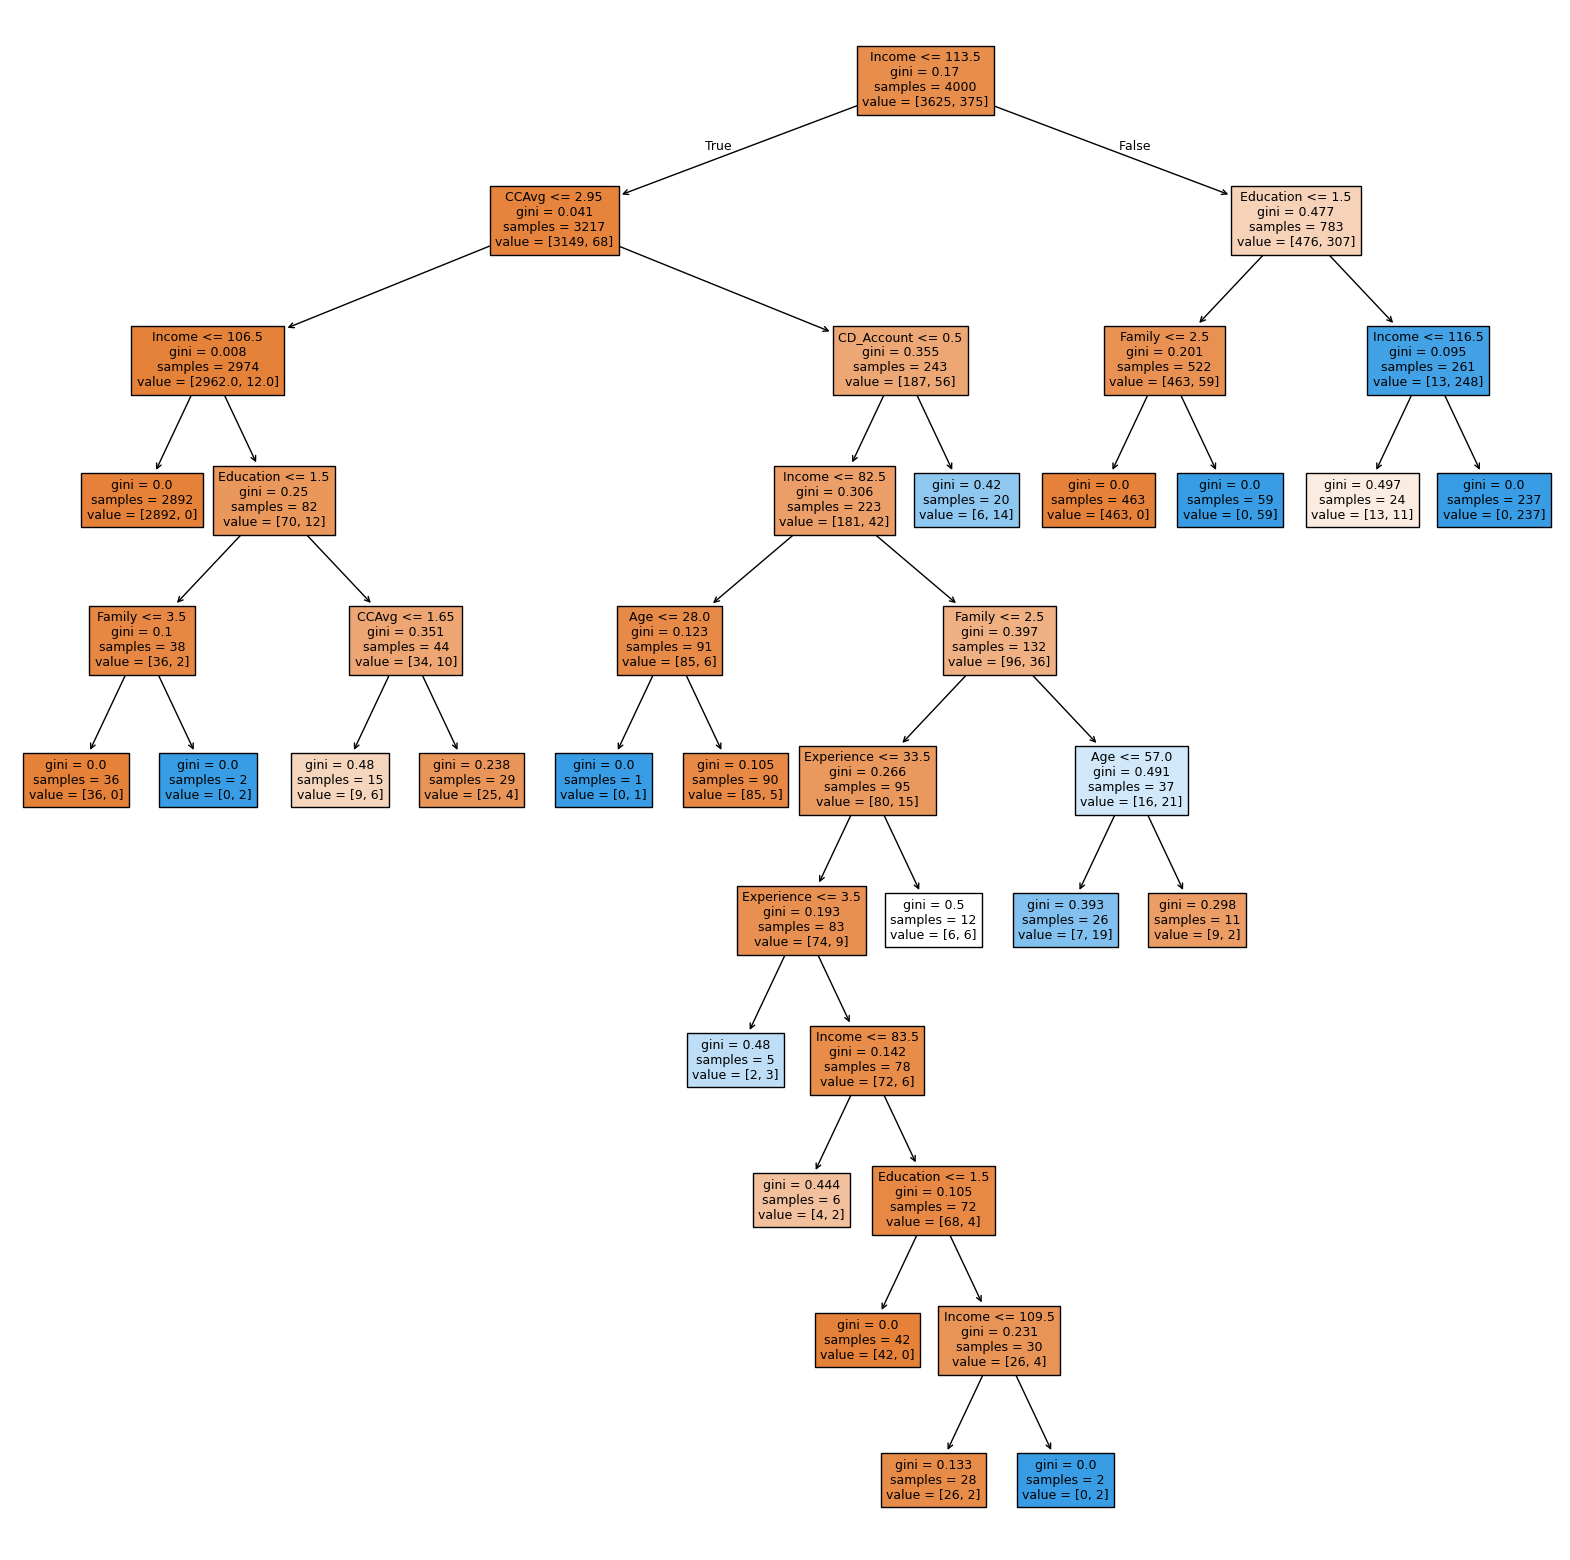

In [ ]:
plot_decision_tree(best_estimator_f1, X_train)

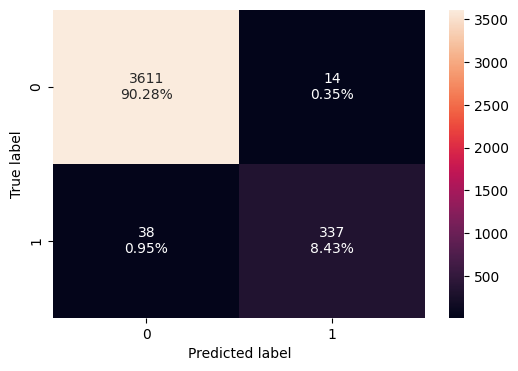

In [ ]:
#print the percentages of TP, FP, TN, FN on train data
plot_confusion_matrix(best_estimator_recall, X_train, y_train)

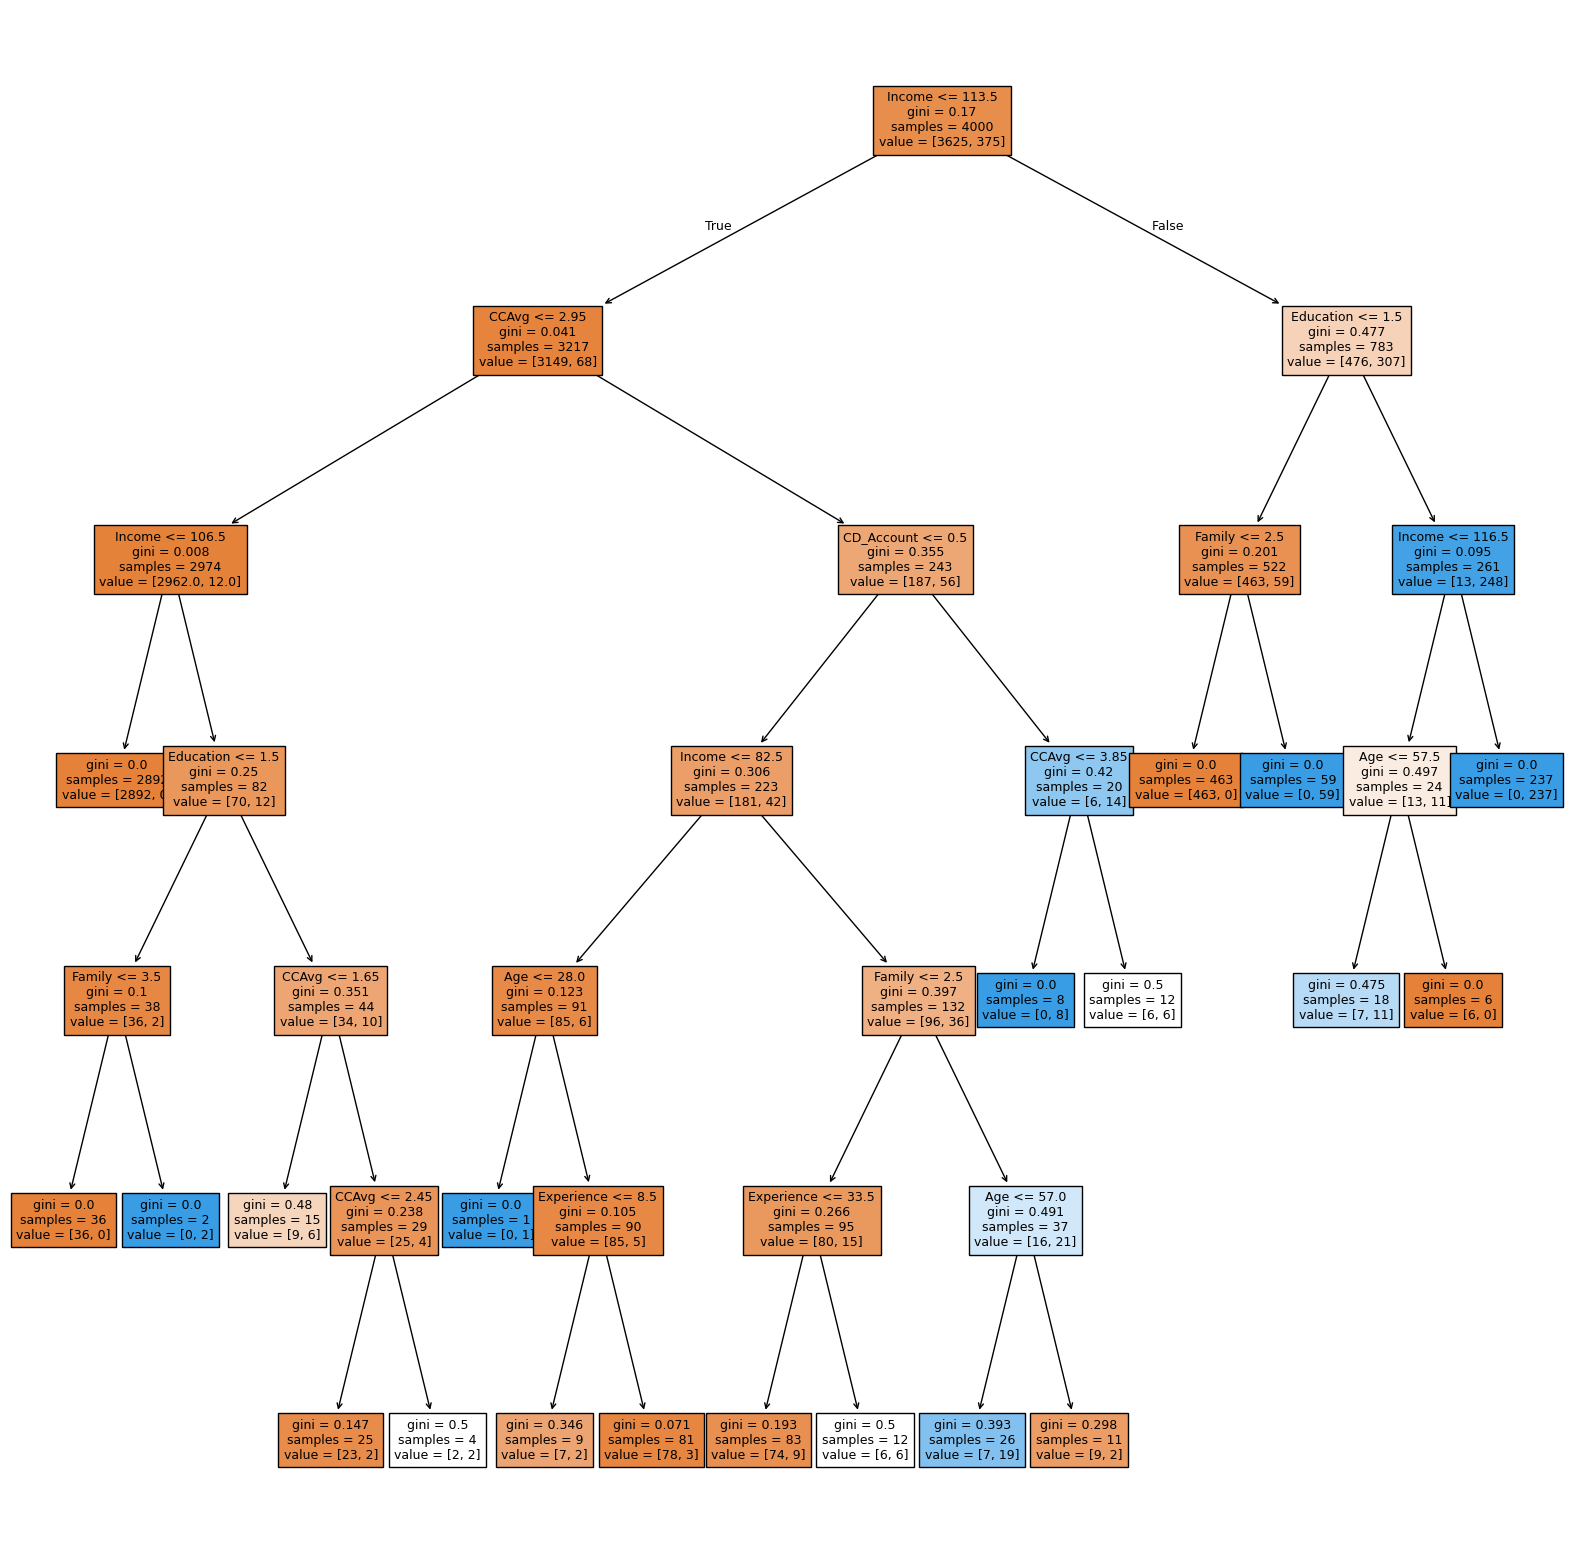

In [ ]:
plot_decision_tree(best_estimator_recall, X_train)

In [ ]:
#print the evaluation parameters on test data
model_performance_classification(best_estimator_f1, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.986,0.914286,0.950495,0.932039


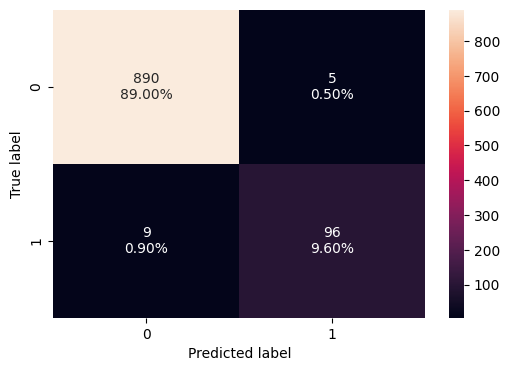

In [ ]:
#print the percentages of TP, FP, TN, FN on test data
plot_confusion_matrix(best_estimator_f1, X_test, y_test)

In [ ]:
#print the evaluation parameters on test data
model_performance_classification(best_estimator_recall, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.982,0.895238,0.930693,0.912621


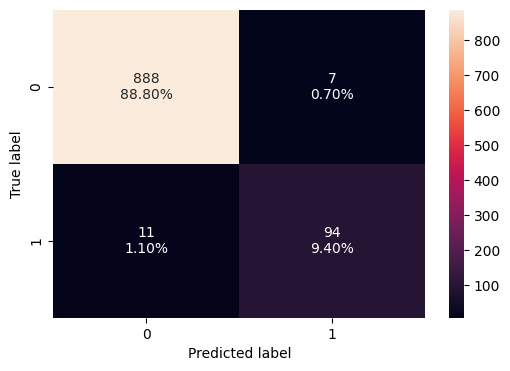

In [ ]:
#print the percentages of TP, FP, TN, FN on test data
plot_confusion_matrix(best_estimator_recall, X_test, y_test)

* As recall is the primary metrics to look in based on the objective
* Found the best_estimator for both f1 score and recall score
* On training data metrics for model based on best f1 score and recall score, they have similar recall, precision and f1 scores
* On test data metrics for model based on best f1 and recall score, the model based on best f1 score to do a little better on recall, precision and f1 metrics.
* Hence we can consider the best_estimator_f1 as a better mode based on pre-pruning.


In [ ]:
#function to plot the importance of the attributes
def plot_model_importance(model, predictors):
    """
    To plot the importance of the attributes

    """
    importances = model.feature_importances_
    indices = np.argsort(importances)
    feature_names = list(predictors.columns)

    plt.figure(figsize=(8, 8))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

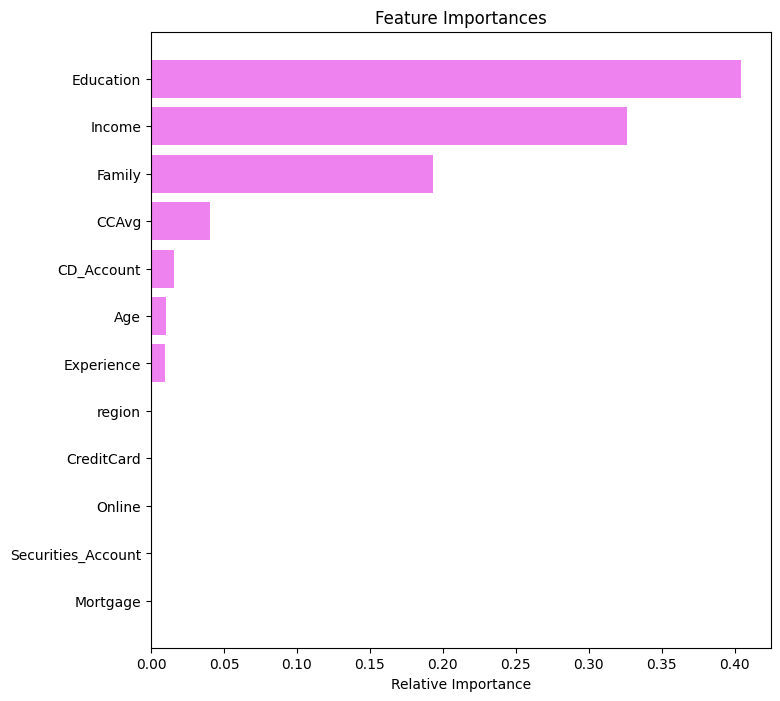

In [ ]:
#Plot the importance for best_estimator_f1
plot_model_importance(best_estimator_f1, X_train)


* In the pre-pruned model, Education, Income & Family seems to be the most important attributes

### Post-pruning - Decision Tree

In [ ]:
clf = DecisionTreeClassifier(random_state=10, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-7.515235e-15
1,2.450147e-19,-7.514990e-15
2,3.215818e-19,-7.514668e-15
3,4.594026e-19,-7.514209e-15
4,1.102566e-18,-7.513106e-15
5,1.102566e-18,-7.512004e-15
6,4.144833e-18,-7.507859e-15
7,6.891039e-18,-7.500968e-15
8,7.253457e-18,-7.493714e-15
9,1.048051e-16,-7.388909e-15


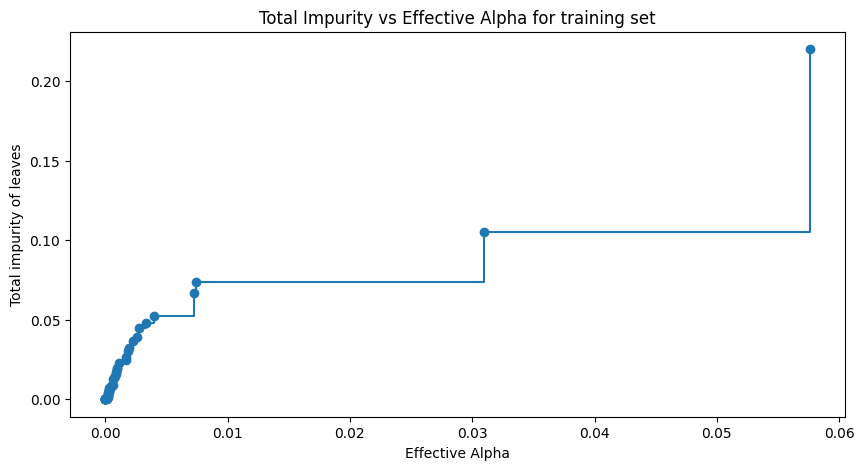

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

In [ ]:
#run the decision tree model with each ccp alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=10, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2798389636807542


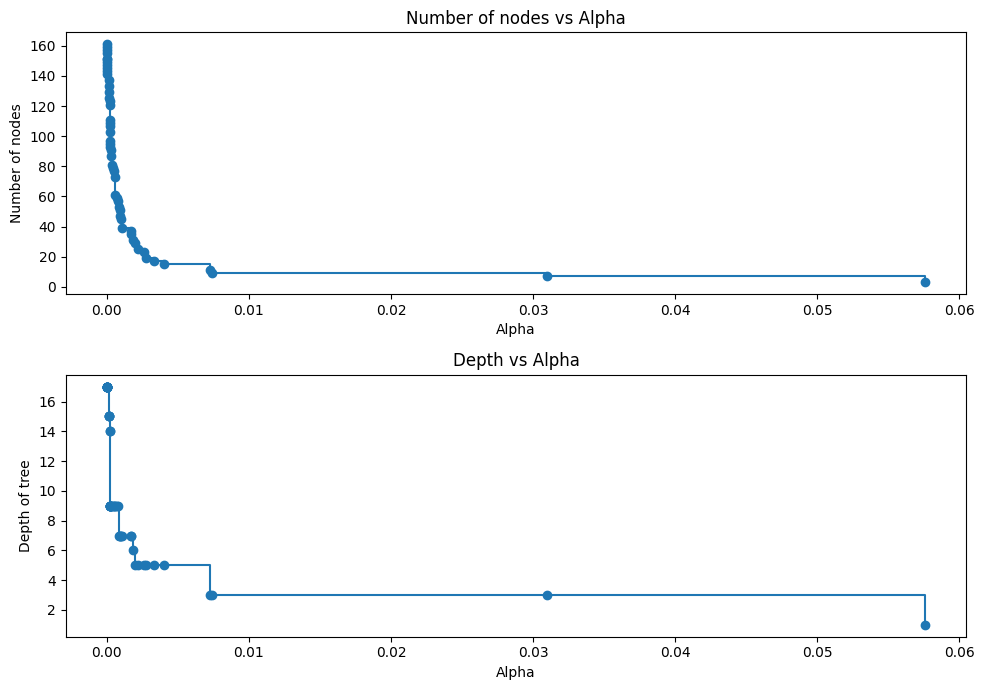

In [ ]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

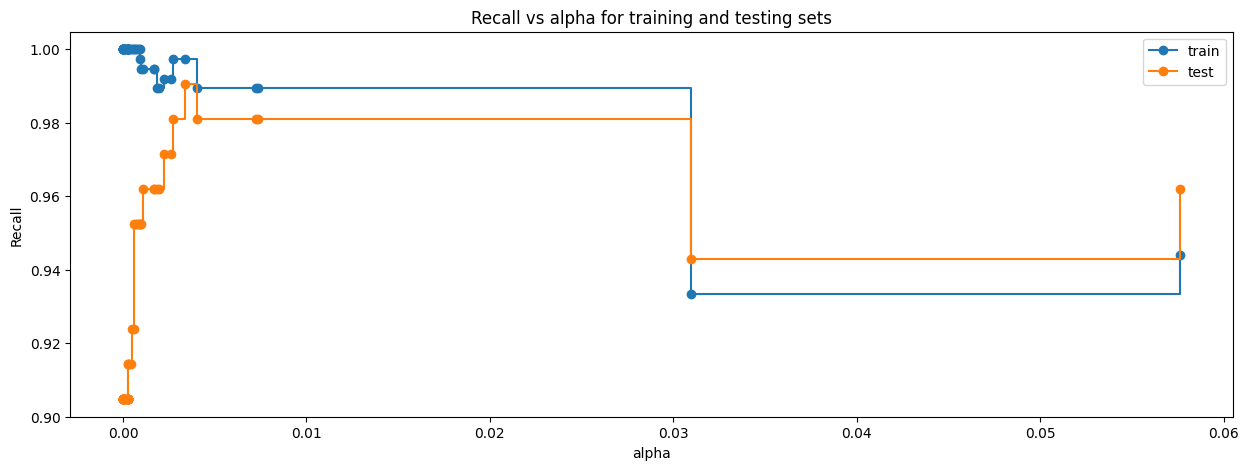

In [ ]:
#collect all the recall scores for all trained models for various ccp alphas on trained data
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

#collect all the recall scores for all trained models for various ccp alphas on test data
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

#plot all recall scores for train and test data
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.003361530304264535, class_weight='balanced',
                       random_state=10)


In [ ]:
best_model_postpruning = best_model
model_performance_classification(best_model_postpruning, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.94125,0.997333,0.615132,0.760936


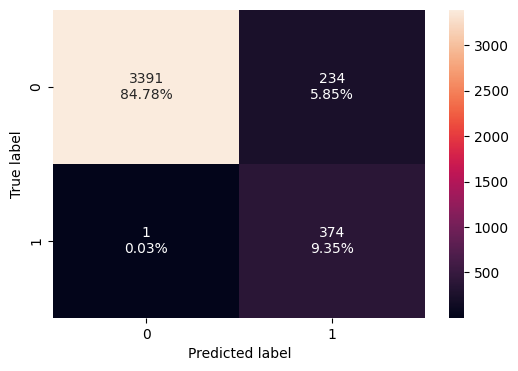

In [ ]:
plot_confusion_matrix(best_model_postpruning, X_train, y_train)

In [ ]:
model_performance_classification(best_model_postpruning, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.943,0.990476,0.65,0.784906


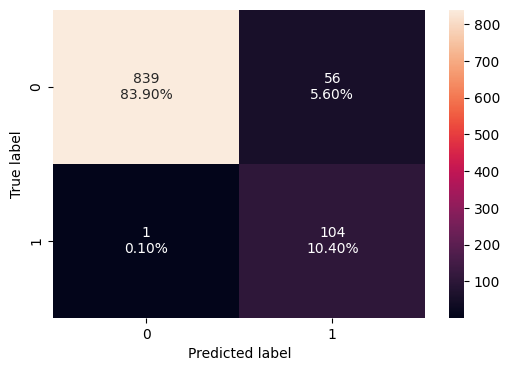

In [ ]:
plot_confusion_matrix(best_model_postpruning, X_test, y_test)

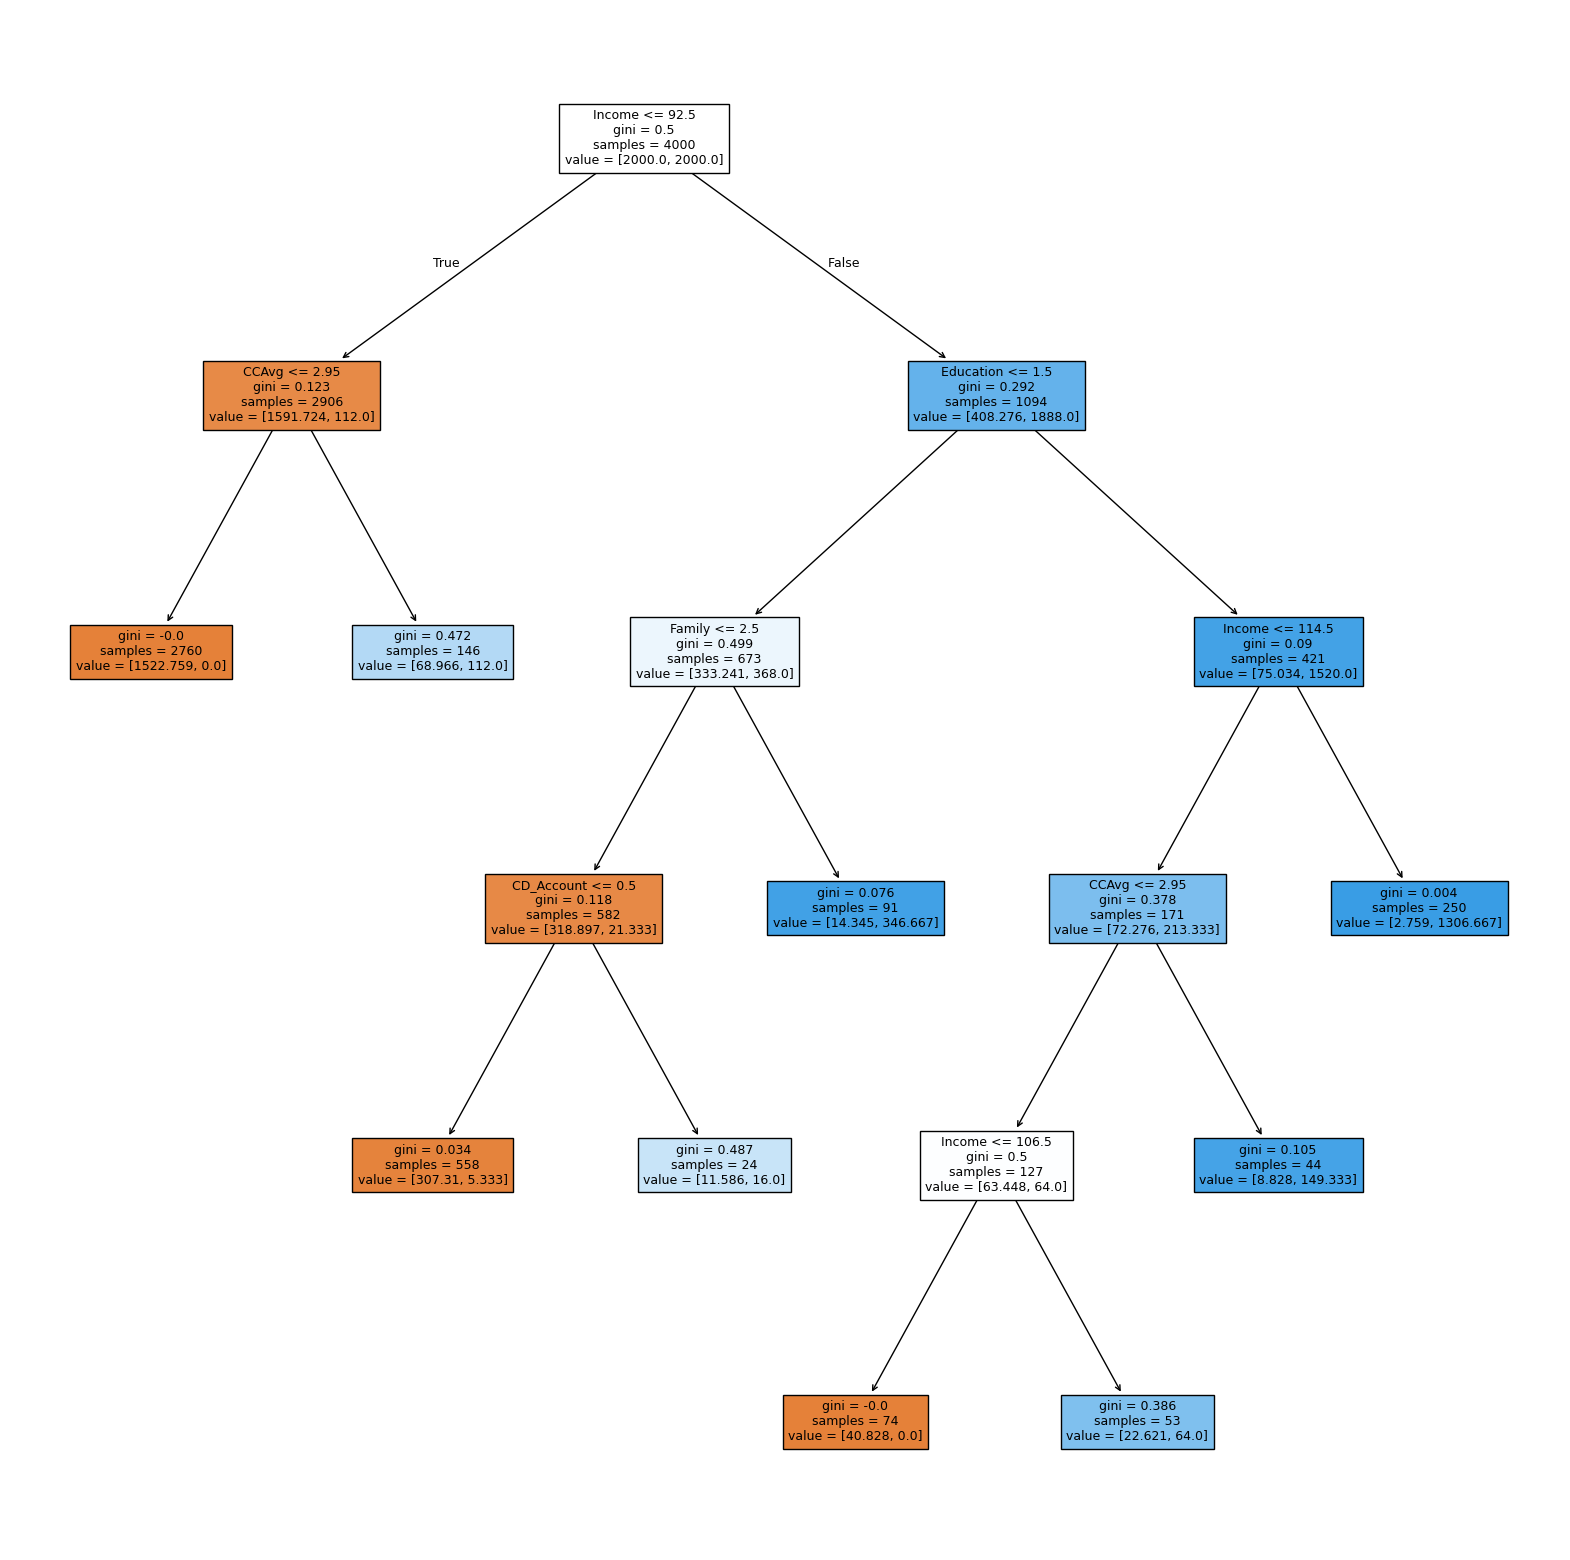

In [ ]:
plot_decision_tree(best_model_postpruning, X_train)

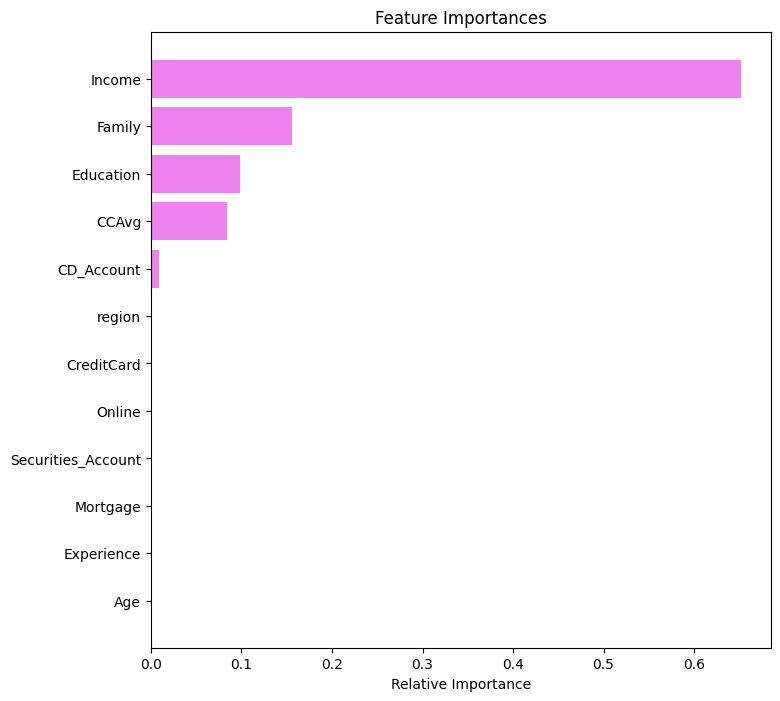

In [ ]:
plot_model_importance(best_model_postpruning, X_train)

* The recall score at pretty good, at .99 on both train and test data
* But if you notice the FP on both train and test, they are too high
* Income is the most important attribute, other less significant attributes are Family, Education & CCAvg
* Overall other metrics for the model are not great like precision around .65 and F1 around .78

## Model Performance Comparison and Final Model Selection

In [ ]:
# comparison of various model metrics
dtree_default = dtree
models_train_comp_df = pd.concat(
    [
        model_performance_classification(dtree_default, X_train, y_train).T,
        model_performance_classification(best_estimator_recall, X_train, y_train).T,
        model_performance_classification(best_estimator_f1, X_train, y_train).T,
        model_performance_classification(best_model_postpruning, X_train, y_train).T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning) Recall",
    "Decision Tree (Pre-Pruning) F1",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning) Recall,Decision Tree (Pre-Pruning) F1,Decision Tree (Post-Pruning)
Accuracy,1.0,0.987000,0.986750,0.941250
Recall,1.0,0.898667,0.898667,0.997333
Precision,1.0,0.960114,0.957386,0.615132
F1,1.0,0.928375,0.927098,0.760936


 * As the performance of the Pre-pruning seems to be better in terms of metrics and identifying the importance of the attributes
 * Pre-pruning  Recall & F1 metrics are similar on train data
 * Decision Tree (Pre-Pruning) F1 metrics are slightly better on test data. Hence will select this model

___